## Detecting objects with contours 

### Reading mutiple images from folder

In [1]:
# importing libraries
import cv2
import numpy
import glob
import imutils
import matplotlib.pyplot as plt

In [2]:
#get the path in a variable
# glob.glob(path): Return a possibly-empty list of path names that match path specified
folder_name = glob.glob('Image_dataset\\*')

#declare list to store file names in the folder
list_image_names = []

#iterate over the folder to get image names in the list
for file in folder_name:
    for f in glob.glob(file+'/*.jpeg'):
        list_image_names.append(f)

#list for storing the images
img_list = []     

#read the image and change it to binary as we need it in binary mode for contour
for image in list_image_names:
    img_list.append((cv2.cvtColor(cv2.imread(image), cv2.COLOR_BGR2GRAY)))

### Contour implementation

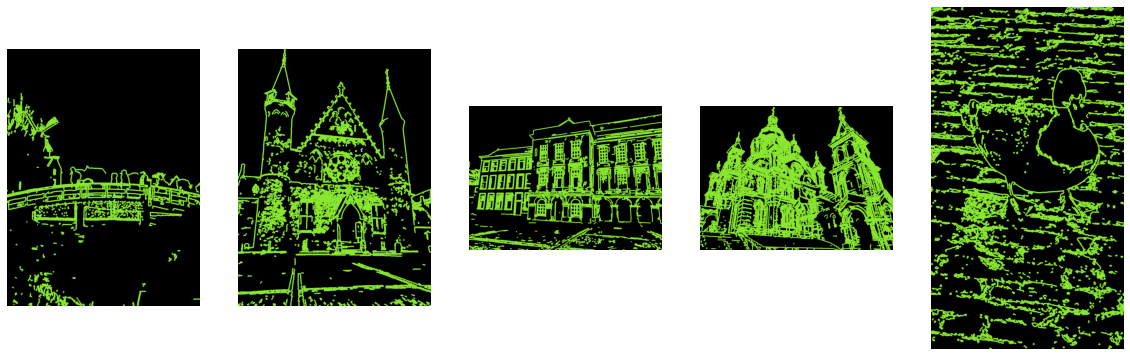

In [3]:
rows = 1
cols = 5
axes=[]
i=1
fig=plt.figure(figsize=(20,15))


#bilateralfilter(image, diameter, sigmaColor, sigmaSpace): blurs the image with filter by keeping edged sharp. sigmaColor specifies the influence of neighborhood pixels while dimater specifies are to look to neighborhood
#threshdold(image): return the images in binary
#findContours(image): return a list of contours with a collection of all points
# drawContours(image, color): returns an image with drawing the contours in the image specified with specified color. Color can be changed as per their RBG codes.
for image in img_list:
    axes.append( fig.add_subplot(rows, cols, i) )
    gray = cv2.bilateralFilter(image, 3, 5, 5)
    #edge detection with reference to previous article
    edged = cv2.Canny(gray, 100, 200)
    cnts = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    img = cv2.cvtColor(edged, cv2.COLOR_GRAY2BGR)  #add this line
    img = cv2.drawContours(img, cnts, -1, (136, 231, 46), 3) 
    plt.imshow(img)
    plt.axis('off')
    i=i+1 
plt.axis('off')
plt.show()

